In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [ ]:
#Create a Model Class that inherits a nn.Module
class Model(nn.Module):
  # Input Layer --> Features of the flowers
  # Hidden Layer1 (Number of neurons)
  # Hidden Layer 2
  # Output Layer --> Class of Iris flower

  def __init__(self, in_features = 4, h1 = 8, h2 = 10, out_features = 3):
    super().__init__() #Instantiating
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
# Picking manual seed for Randomization
torch.manual_seed(42)
# Creating an instace of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [ ]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
# Changing the Categorical data into Numbers
df['species'] = df['species'].replace({
    'setosa': 0.0,
    'versicolor': 1.0,
    'virginica': 2.0
})
df

/tmp/ipython-input-2433260897.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Splitting X and y
X = df.drop('species', axis = 1)
y = df['species']

In [ ]:
# Chaning the values into Numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Converting X values into Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Converting Y values into Tensors Long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Setting up a criterion of the model to judge the errors and how far off our predictions are.
criterion = nn.CrossEntropyLoss()
# Choosing the optimizer (Adam Optimizer), lr (Learning Rate) {If the error doesn't go down after some iterations, we have to lower our learning rate}
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)>

In [ ]:
# Training the model!
# Epochs --> One run through all the training set in our network.
epochs = 200
losses = []
for i in range(epochs):
  # Getting a prediction
  y_pred = model.forward(X_train) #Getting the predicted results
  # Measure the loss
  loss = criterion(y_pred, y_train)  # Predicted values vs the y_train

  # Keeping track of the Losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Back Propagation: Take the error rate of forward propagation, feed it back through the network to fine tune the weights again.

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.04701234772801399
Epoch: 10 and loss: 0.04928592965006828
Epoch: 20 and loss: 0.047708846628665924
Epoch: 30 and loss: 0.0479639396071434
Epoch: 40 and loss: 0.0469132624566555
Epoch: 50 and loss: 0.04699305072426796
Epoch: 60 and loss: 0.046944424510002136
Epoch: 70 and loss: 0.04689999297261238
Epoch: 80 and loss: 0.046881016343832016
Epoch: 90 and loss: 0.04686838760972023
Epoch: 100 and loss: 0.04685765504837036
Epoch: 110 and loss: 0.04684877768158913
Epoch: 120 and loss: 0.046839967370033264
Epoch: 130 and loss: 0.04683099687099457
Epoch: 140 and loss: 0.046822067350149155
Epoch: 150 and loss: 0.04681305214762688
Epoch: 160 and loss: 0.04680406674742699
Epoch: 170 and loss: 0.04679511487483978
Epoch: 180 and loss: 0.04678621515631676
Epoch: 190 and loss: 0.04677734524011612


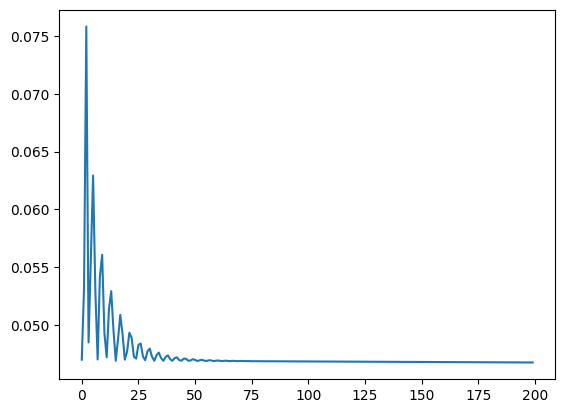

In [ ]:
# Graph the stuffs out
plt.plot(range(epochs), losses)
plt.ylabel = ("loss/losses")
plt.xlabel = ('Epochs')